## 문제 1)
- 빵집에서는 매일 아침에 구워지는 식빵 한 개의 평균 무게가 500g이 되도록 맞추고자 합니다.
- 빵집 주인은 오늘 아침에 구운 식빵 중에서 랜덤하게 25개의 식빵을 샘플링하여 무게를 측정했습니다.
- 그 결과, 표본 평균은 495g, 표준편차는 10g으로 나왔습니다.
- 빵집 주인이 목표한 500g의 무게를 충족하고 있는지(다시말해 목표 무게를 넘는지 안 넘는지)  
- 5% 유의수준에서 검정해보세요

예시결과
### 결과 출력
if p_value < alpha:
- print(f"t-값: {t_statistic:.4f}, p-value: {p_value:.4f}.
- 유의수준 {alpha}에서 귀무가설을 기각합니다.
- 빵의 평균 무게는 목표와 다릅니다.")

else:
- print(f"t-값: {t_statistic:.4f}, p-value: {p_value:.4f}.
- 유의수준 {alpha}에서 귀무가설을 채택합니다
- 빵의 평균 무게는 목표와 통계적으로 차이가 없습니다.")    


- t-값: -2.5000,
- p-value: 0.0197.
- 유의수준 0.05에서 귀무가설을 기각합니다.
- 빵의 평균 무게는 목표와 다릅니다.

In [ ]:
# 단일표본 t-검정(빵의 무게가 목표보다 작은지 확인)

# 모집단 평균 가설: 뮤 = 500
# 표본 평균: 495

# 표본 크기: 25
# 표본 표준편차: 10
# 유의수준: 0.05


In [ ]:
import scipy.stats as stats

# 주어진 초기값
sample_mean = 495      # 표본 평균
population_mean = 500  # 모집단(목표) 평균

std_dev = 10           # 표본 표준편차
n = 25                 # 표본 크기
alpha = 0.05           # 유의수준

In [ ]:
# t-통계량 계산
t_statistic = (sample_mean - population_mean) / (std_dev / (n ** 0.5))
t_statistic

-2.5

In [ ]:
# 단측 검정 (왼쪽 꼬리): 평균이 목표보다 **작은지** 검정
p_value = stats.t.cdf(t_statistic, df=n-1)
p_value

#stats.t.cdf : t-분포의 누적분포함수(CDF,Cumulative Distribution Function).특정t-값 이하의 확률을 구함
#scipy.stats.t.cdf(x, df) : x는 누적확률을 계산하고자 하는 값, df는 자유도
# t-분포에서 t값이 x보다 작을 확률


np.float64(0.009827087558289377)

In [ ]:
# 결과 출력
if p_value < alpha:
    print(
        f"t-값: {t_statistic:.4f}, p-value: {p_value:.4f}."
        f"유의수준 {alpha}에서 귀무가설을 기각합니다."
        "빵의 평균 무게는 목표와 다릅니다.")
else:
    print(f"t-값: {t_statistic:.4f}, p-value: {p_value:.4f}."
        f"유의수준 {alpha}에서 귀무가설을 채택합니다."
         "빵의 평균 무게는 목표와 통계적으로 차이가 없습니다.")


t-값: -2.5000, p-value: 0.0098.유의수준 0.05에서 귀무가설을 기각합니다.빵의 평균 무게는 목표와 다릅니다.


=====================================================================
### 문제2) 분포 시각화

문제 1번을 바탕으로 분포를 그리고 t통계량을 빨간색 점선으로,
초록색 점선으로 임계값을 기각역을 초록색으로 칠해보세요.

***기각역**:  통계량이 들어왔을 경우 귀무가설을 기각할 수 있는 영역을 말합니다.

 Hint)

- `plt.axvline` : y축 평행선 그리기
- `plt.fill_between` : 그래프 면적 색칠하기

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import t


# 문제1에서 주어진 초기값
sample_mean = 495      # 표본 평균
population_mean = 500  # 모집단(목표) 평균

std_dev = 10           # 표본 표준편차

n = 25                 # 표본 크기
df = n-1               # 자유도
alpha = 0.05           # 유의수준

In [ ]:
# t-통계량 계산
t_statistic = (sample_mean - population_mean) / (std_dev / np.sqrt(n))
t_statistic

# numpy.sqrt(x, /, out=None, *, where=True, casting='same_kind', order='K',
#          dtype=None, subok=True[, signature]) = <ufunc 'sqrt'>

np.float64(-2.5)

In [ ]:
# 임계값 (왼쪽 단측)
t_critical = t.ppf(alpha, df)       #임곅값 계산
t_critical

# t.ppf : 부적분포함수(CDF)의 역함수. 퍼센트포인트 함수(ppf, percent point function)
#          주어진 누적확률에 해당하는 t-분포의 임계값(critical value) 반환
# 자유도(alpha)인 t-분포에서 왼쪽 꼬리의 5%에 해당하는 값을 반환

np.float64(-1.7108820799094282)

In [ ]:
# x축 범위 설정
x = np.linspace(-4, 4, 500)
y = t.pdf(x, df)                        # t-분포 곡선시각화

# numpy.linspace(start, stop, num=50, endpoint=True, retstep=False, dtype=None, axis=0, *, device=None)
#               특정 구간을 일정한 간격으로 나눈 수열(등간격 수열)을 생성할 때 사용하는 함수
#               그래프를 부드럽게 그릴 때, 정밀한 분석용 수열을 만들 때 유용
#   num:생성할 숫자 개수(기본값 50개). endpoint: stop값을 포함할지 여부,
#   retstep: true로 설정하면 간격도 함꼐 반환,  dtype:생성될 배열의 자료형 지정

Text(0.5, 1.0, 't-distribution')

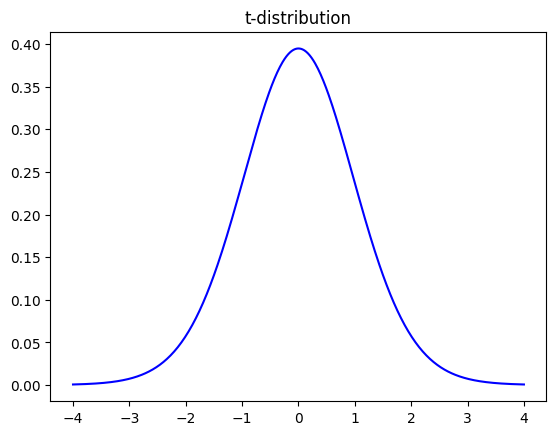

In [ ]:
# 그래프 그리기
plt.plot(x, y, color='blue')
plt.title('t-distribution')

#matplotlib.pyplot.plot(*args, scalex=True, scaley=True, data=None, **kwargs)
#         선그래프 그릴 때 사용. x값과 y값의 순서쌍을 연결하여 꺽은선 그리기
# 선 색상: 스타일, 마커지정 문자열('ro--')

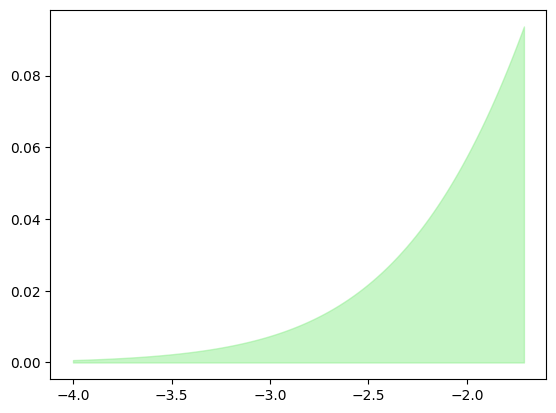

In [ ]:
# 임계값 기준으로 왼쪽 꼬리 기각역 색칠
x_fill = np.linspace(-4, t_critical, 200)
plt.fill_between(x_fill, t.pdf(x_fill, df), color='lightgreen', alpha=0.5)


# matplotlib.pyplot.fill_between(x, y1, y2=0, where=None,
#                               interpolate=False, step=None, *, data=None, **kwargs)
# where : 특정 조건에서만 음영처리(블리언 배열). alpha : 투명도(0은 완전 투명 ~ 1은 불투명)

# 두 곡선 사이, 곡선과 x축 사이의 영역을 색으로 채워주는 함수
# 주로 기각역 음영처리, 누적 면적 시각화, 불확실성 영역표시(신뢰구간)


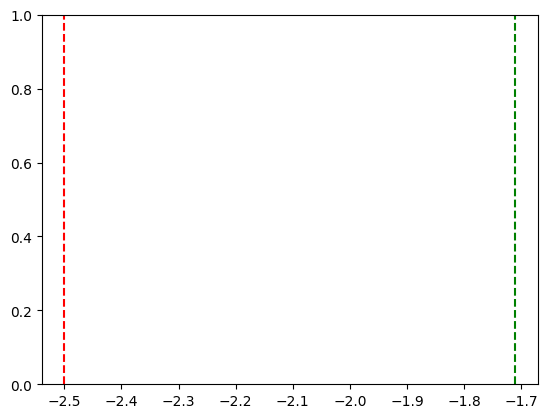

In [ ]:
# 임계값(초록 점선), t-값(빨간 점선)
plt.axvline(t_critical, color='green', linestyle='--')  # 임계값
plt.axvline(t_statistic, color='red', linestyle='--')   # t통계량


# matplotlib.pyplot.axvline(x=0, ymin=0, ymax=1, **kwargs)
# plt.axvline(x=0, color='k', linestyle='--', linewidth=1, label=None)

# lineatyle : '-', '--', ':', '-.'
# linrwidth or lw : 선 굵기,

# 그래프에 수직선을 그릴 때 사용하는 함수
# 주로 임계값, 기준선, 평균선, 특정 x위치 강조 등

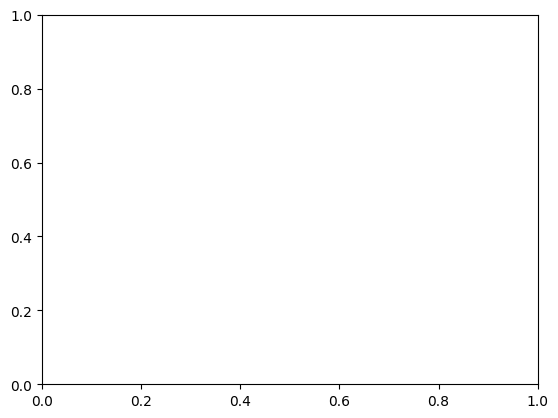

In [ ]:
# y축 기준선
plt.axhline(0, color='black', linewidth=0.5)

plt.show()

## 문제 2 (2) : 전체 다시


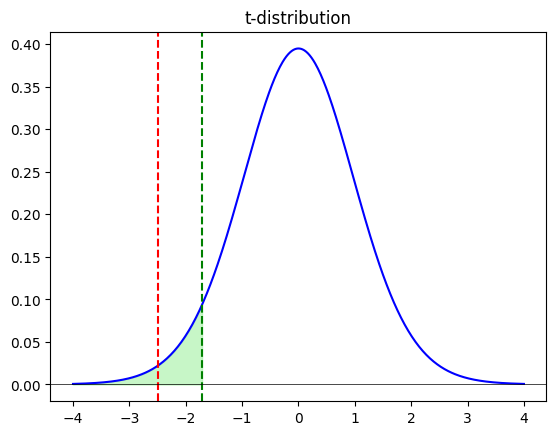

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import t


# 문제1에서 주어진 초기값
sample_mean = 495      # 표본 평균
population_mean = 500  # 모집단(목표) 평균

std_dev = 10           # 표본 표준편차

n = 25                 # 표본 크기
df = n-1               # 자유도
alpha = 0.05           # 유의수준

# t-통계량 계산
t_statistic = (sample_mean - population_mean) / (std_dev / np.sqrt(n))

# 임계값 (왼쪽 단측)
t_critical = t.ppf(alpha, df)       #임곅값 계산

# x축 범위 설정
x = np.linspace(-4, 4, 500)
y = t.pdf(x, df)                        # t-분포 곡선시각화

# 그래프 그리기
plt.plot(x, y, color='blue')
plt.title('t-distribution')

# 임계값 기준으로 왼쪽 꼬리 기각역 색칠
x_fill = np.linspace(-4, t_critical, 200)
plt.fill_between(x_fill, t.pdf(x_fill, df), color='lightgreen', alpha=0.5)

# 임계값(초록 점선), t-값(빨간 점선)
plt.axvline(t_critical, color='green', linestyle='--')  # 임계값
plt.axvline(t_statistic, color='red', linestyle='--')   # t통계량

# y축 기준선
plt.axhline(0, color='black', linewidth=0.5)


=====================================================================
### 문제 3) 단일 t 표본 검정

- 어느 학교에서 새로운 교육 프로그램을 도입한 후 학생들의 수학 성적이 향상되었는지 확인하려고 합니다.
- 프로그램 도입 후 무작위로 선택한 16명의 학생들의 수학 성적 평균은 78점이고, 모집단의 평균은 75점입니다.
- 모집단의 표준편차는 알 수 없다고 합니다.
- 유의수준 0.05에서 이 교육 프로그램이 성적 향상에 효과가 있는지 단일 표본 t-검정을 실시하세요.

<aside>
💡

- 수업시간에 양측검정을 기준으로 배웠습니다.
- 다시말하면 데이터의 평균이 특정 값과 같은지 아닌지(방향은 관심없음)입니다.
- 문제는 **향상에 효과가 있는지** 에 대한 물음입니다.
- 함수를 무엇을 어떻게 넣어야할지 고민해보세요!(힌트 scipy docs 참고)

</aside>

In [5]:
import numpy as np
from scipy import stats

# Sample data
sample_scores = [79, 77, 80, 76, 78, 81, 75, 79, 77, 80, 78, 76, 82, 77, 79, 81]

pu = 75        # population mean
alpha = 0.05   # significance level


In [6]:
# Perform one-sample t-test
t_stat, p_value = stats.ttest_1samp(sample_scores, pu)


# ttest_1samp(a, popmean, axis=0, nan_policy='propagate', alternative='two-sided', *, keepdims=False)
#            단일본

In [8]:
# Result output
if p_value < alpha:
    print(f"t-값: {t_stat:.4f}, p-value: {p_value:.4f}."
           "유의수준 {alpha}에서 귀무가설을 기각합니다. 교육프로그램은 효과가 있습니다.")
else:
    print(f"t-값: {t_stat:.4f}, p-value: {p_value:.4f}."
            "유의수준 {alpha}에서 귀무가설을 채택합니다. 교육프로그램은 효과가 없습니다.")


t-값: 6.7666, p-value: 0.0000.유의수준 {alpha}에서 귀무가설을 기각합니다. 교육프로그램은 효과가 있습니다.


=====================================================================
### 문제 4) 독립 표본 t 검정

- 한 연구소에서 두 가지 새로운 다이어트 프로그램의 효과를 비교하려고 합니다.
- 연구소는 두 그룹의 참가자들을 대상으로 12주간 다이어트 프로그램을 진행한 후 체중 감소량을 측정했습니다.
- 유의수준 5% 에서 두 그룹 간 평균 체중 감소량에 유의미한 차이가 있는지 독립 표본 t-검정을 실시하세요.

<aside>
💡

- 관찰연구에서는  두개의 그룹을 t검정을 할때 등분산성을 검정하게 됩니다.
-  `scipy.stats.levene` 문서를 읽고 등분산 검정 후 적절한 검정방법을 적용해보세요.
- 등분산 검정에도 역시 귀무가설과 대립가설이 존재합니다.

</aside>

In [13]:
# 귀무가설: 두 집단의 평균 차이는 없다. H0,
# 대립가설: 두 집단의 평균 차이는 있다. H1. 양측겁정

# 유의수준: 0.05

# 등분선 검정, 독립표본 t검정, 결과출력

In [14]:
import numpy as np
from scipy import stats

# 그룹 A와 B의 체중 감소량 데이터
group_A = [5.1, 4.7, 6.2, 4.9, 5.3, 6.1, 5.0, 5.8, 4.8, 5.2]
group_B = [4.3, 4.1, 3.8, 4.6, 4.0, 4.5, 3.7, 4.2, 3.9, 4.4, 3.5, 4.3]

# 유의수준
alpha = 0.05

In [15]:
# 1. 등분산성 검정
levene_stat, levene_p = stats.levene(group_A, group_B)


# scipy.stats.levene(*samples, center='median', proportiontocut=0.05, axis=0, nan_policy='propagate', keepdims=False)
# levene_stat   : Levene 검정 통계량
# levene_p : p-value 로 등분산 여부 판단 기

# 두 집단의 분산이 같은지(등분산성)를 검정하는 Levene 의 등분산성 검정  수행
# 독립표본 t-검정을 수행하기 전에 확인 조건



In [16]:
# 2. 등분산 여부에 따라 적절한 t-검정 수행
equal_var = True if levene_p >= alpha else False

t_stat, p_value = stats.ttest_ind(group_A, group_B, equal_var=equal_var)


# equal_val : Levene의 등분산성 검정 결과를 기반으로, 독립표본 t-검정에서 사용할
#             equal_val 값을 자동 설정하는 조건문
# levene_p >= alpha : 귀무가설 채택(등분산)  True
# levene_p < alpha  : 귀무가설 기각(이분산)  False


# ttest_ind(a, b, *, axis=0, equal_var=True, nan_policy='propagate', permutations=None,
#               random_state=None, alternative='two-sided', trim=0, method=None, keepdims=False)
# stats.ttest_ind(a, b, equal_var=True)
#               equal_var = True  : 두 집단의 분산이 같다고 가정 (등분산 t-검정)
#               equal_var = False : 두 집단의 분산이 다르다고 가정 (Welch의 t-검정)




In [17]:
# 3. 결과 출력
if p_value < alpha:
    print(f"t-값: {t_stat:.4f}, p-value: {p_value:.4f}. "
          "유의수준 {alpha}에서 귀무가설을 기각합니다. 다이어트 프로그램은 효과가 있습니다.")
else:
    print(f"t-값: {t_stat:.4f}, p-value: {p_value:.4f}. "
           "유의수준 {alpha}에서 귀무가설을 채택합니다. 다이어트 프로그램은 효과가 없습니다.")


t-값: 6.3898, p-value: 0.0000. 유의수준 {alpha}에서 귀무가설을 기각합니다. 다이어트 프로그램은 효과가 있습니다.


=====================================================================
### 문제 5) 대응표본 t검정

- 대응표본 t-검정은 두 집단간 평균 차이를 비교할 때 사용되는 점은 독립 t검정 동일하나,
- 같은 집단에서 두 번 수집할 때 사용되는 검정입니다
- ( ex 고혈압 투여 전후 환자 단일 그룹의 혈압의 차)
- `scipy.stats` docs에서 적절한 함수를 찾아보고 적용해보세요.

</aside>

- 운동 프로그램 전후의 체중 변화를 분석하기 위해 10명의 참가자의 체중을 측정했습니다.
- 유의수준 5%에서 운동 프로그램이 체중 감소에 효과가 있는지 **대응 표본 t-검정**을 실시하세요.
- 또한, 대응표본t검정에서 등분산 검정이 필요한지 고민해봅시다.

### 대응표본 t-검정, 독립 t-검정 :
- 같은 점 : 두 집단 간 평균차이를 비교

### 대응표본 t-검정:
- 같은 집단에서 두 번 수집시 사용
- before와 after는 같은 그룹의 측정값이므로 → 대응표본 t-검정

- 유의수준 alpha = 0.05

### 가설:
- 귀무가설(H0): 평균 변화가 없다 (전후 체중 차이가 0이다.)
- 대립가설(H1): 평균 변화가 있다 (차이 0이 아니다.)

### 등분산:
- 등분산 검정은 필요 없음
- 대응표본은 분산 비교가 아님

In [19]:
import numpy as np
from scipy import stats

# 운동 전후 체중 데이터
before = np.array([70, 80, 65, 90, 75, 85, 78, 82, 68, 73])
after = np.array([68, 78, 64, 88, 74, 83, 77, 80, 67, 72])

# 유의수준
alpha = 0.05

In [23]:
# 대응표본 t-검정(Paired Sample t-test)
t_stat, p_value = stats.ttest_rel(before, after)


# ttest_rel(a, b, axis=0, nan_policy='propagate', alternative='two-sided', *, keepdims=False)
# stats.ttest_rel(before, after)

# 같은 대상에서 두 번 측정한 값의 평균 차이가 통계적으로 유의미 한지를 판단할 때 사용

# t_stat : t-검정량
# 결과를 기반으로 유의수준 alpha 와 비교 : 효과가 있는지 여부 판단




### 대응표본 t-검정 사용조건:
- 같은 실험 대상에게 부 번 측정함
- 시간의 흐름(전후), 조건 변화 전후 측정
- 관찰값 간에 쌍(pare)이 존재함


### 두 집단이 서로 독립인 경우:
- ttest_ind() 사용

In [22]:
# 결과 출력
if p_value < alpha:
    print(f"t-값: {t_stat:.4f}, p-value: {p_value:.4f}. "
           "유의수준 {alpha}에서 귀무가설을 기각합니다. 고혈압약은 효과가 있습니다.")
else:
    print(f"t-값: {t_stat:.4f}, p-value: {p_value:.4f}."
           " 유의수준 {alpha}에서 귀무가설을 채택합니다. 고혈압약은 효과가 없습니다.")

t-값: 9.0000, p-value: 0.0000. 유의수준 {alpha}에서 귀무가설을 기각합니다. 고혈압약은 효과가 있습니다.


=====================================================================
### 문제 6) 표본 추출

- Quest 05-01의  Online Retail II 데이터에서 표본을 추출하여 모집단의 평균을 추정해보세요.
- 영국(United Kingdom)에서 주문된 데이터 에서 30개, 100개, 300개의 샘플을 무작위 추출하여 평균 구매 금액(Total Price)를 계산해보세요.
- 표본의 크기가 커질 수록 모집단의 평균과 가까워지는지 확인해보세요.
- 데이터 불러오는 코드 & 예상결과

- 데이터	 : Online Retail II (from kagglehub)
- 대상	:  Country == 'United Kingdom' 인 주문만 필터링

- 컬럼 :	TotalPrice (총 구매 금액)
- 샘플 수	 : 30, 100, 300개 표본을 무작위 추출
- 분석 목적 : 표본 평균 vs 모집단 평균 비교

In [36]:
import kagglehub
import os

import pandas as pd
import numpy as np

# 데이터 다운로드 및 불러오기
path = kagglehub.dataset_download("mashlyn/online-retail-ii-uci")
print("Path to dataset files:", path)



Path to dataset files: /kaggle/input/online-retail-ii-uci


In [37]:
retail = pd.read_csv(path + '/' + os.listdir(path)[0])
retail.head(3)

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom


In [38]:
# 1. 영국 데이터 필터링
uk_data = retail[retail['Country'] == 'United Kingdom'].copy()
uk_data

# Country 열이 'United Kingdom'인 True/False 불리언 시리즈 생성
# retail[...]	해당 조건을 만족하는 행만 필터링 (Boolean Indexing)
#.copy()	새로운 복사본 데이터프레임을 생성 (원본과 연결되지 않음)

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom
...,...,...,...,...,...,...,...,...
1067350,581585,22466,FAIRY TALE COTTAGE NIGHT LIGHT,12,2011-12-09 12:31:00,1.95,15804.0,United Kingdom
1067351,581586,22061,LARGE CAKE STAND HANGING STRAWBERY,8,2011-12-09 12:49:00,2.95,13113.0,United Kingdom
1067352,581586,23275,SET OF 3 HANGING OWLS OLLIE BEAK,24,2011-12-09 12:49:00,1.25,13113.0,United Kingdom
1067353,581586,21217,RED RETROSPOT ROUND CAKE TINS,24,2011-12-09 12:49:00,8.95,13113.0,United Kingdom


In [39]:
uk_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 981330 entries, 0 to 1067354
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Invoice      981330 non-null  object 
 1   StockCode    981330 non-null  object 
 2   Description  976948 non-null  object 
 3   Quantity     981330 non-null  int64  
 4   InvoiceDate  981330 non-null  object 
 5   Price        981330 non-null  float64
 6   Customer ID  741301 non-null  float64
 7   Country      981330 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 67.4+ MB


In [40]:
uk_data.isnull().sum()

,0
Invoice,0
StockCode,0
Description,4382
Quantity,0
InvoiceDate,0
Price,0
Customer ID,240029
Country,0


In [42]:
# 3. TotalPrice 생성 (단가 * 수량)
uk_data['TotalPrice'] = uk_data['Quantity'] * uk_data['Price']



In [43]:
# 4. 모집단 평균 계산
population_mean = uk_data['TotalPrice'].mean()

print(f"Population Mean TotalPrice: {population_mean:.2f}")



Population Mean TotalPrice: 16.69


In [44]:
# 5. 표본 추출 및 평균 계산
for size in [30, 100, 300]:
    sample = uk_data.sample(n=size, random_state=42)

    sample_mean = sample['TotalPrice'].mean()
    print(f"Sample size: {size}, Mean TotalPrice: {sample_mean:.2f}")


Sample size: 30, Mean TotalPrice: 11.88
Sample size: 100, Mean TotalPrice: 16.09
Sample size: 300, Mean TotalPrice: 13.34


=====================================================================
### 문제 7) 신뢰구간

- 영국 데이터에서 TotalPrice를 사용하여 95% 신뢰 구간을 계산하세요.
- 또한 표본의 크기가 30,100, 300으로 변하면서 신뢰구간이 변하는 형태를 확인해 보세요.
- Hint) `stats` 모듈에서 신뢰구간을 바로 구하는 함수를 확인해보세요.

- 대상:	uk_data['TotalPrice'] (영국 주문 데이터 중 TotalPrice 컬럼)
- 목적 : 각 표본에 대해 95% 신뢰구간 계산

- 비교 대상 : 샘플 크기별 CI: n = 30, 100, 300
- 결과 해석	: 표본이 커질수록 신뢰구간이 변하는 형태 확인

In [45]:
uk_data. info()

<class 'pandas.core.frame.DataFrame'>
Index: 981330 entries, 0 to 1067354
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Invoice      981330 non-null  object 
 1   StockCode    981330 non-null  object 
 2   Description  976948 non-null  object 
 3   Quantity     981330 non-null  int64  
 4   InvoiceDate  981330 non-null  object 
 5   Price        981330 non-null  float64
 6   Customer ID  741301 non-null  float64
 7   Country      981330 non-null  object 
 8   TotalPrice   981330 non-null  float64
dtypes: float64(3), int64(1), object(5)
memory usage: 74.9+ MB


In [46]:
# 1. 신뢰구간 계산 함수 정의
def confidence_interval(data, confidence=0.95):

    mean = data.mean()
    std_err = stats.sem(data)  # 표준오차

    interval = stats.t.interval(confidence, len(data)-1, loc=mean, scale=std_err)
    return mean, interval


# confidence	신뢰수준 :  0.95는 95% 신뢰수준
# len(data)-1	: 자유도(degrees of freedom), 표본 수 – 1
# loc = mean :분포의 평균 위치 (표본 평균)

# t = <scipy.stats._continuous_distns.t_gen object>
# SciPy의 t.interval() 함수를 사용하여 신뢰구간을 계산하는 명령
# 표본 평균 mean을 기준으로 주어진 신뢰수준(confidence level, 95%)에 해당하는 신뢰구간(CI)을 계산



In [47]:
# 2. 표본 크기에 따른 신뢰구간 계산
sample_sizes = [30, 100, 300]

for size in sample_sizes:
    sample = uk_data['TotalPrice'].sample(n=size, random_state=42)

    mean, interval = confidence_interval(sample)

    print(f"Sample size: {size}, Mean: {mean:.2f}, 95% CI: {interval}")

Sample size: 30, Mean: 11.88, 95% CI: (np.float64(6.37841466090658), np.float64(17.38425200576009))
Sample size: 100, Mean: 16.09, 95% CI: (np.float64(11.142955150004974), np.float64(21.02784484999502))
Sample size: 300, Mean: 13.34, 95% CI: (np.float64(11.264027626023802), np.float64(15.424439040642865))


In [48]:
uk_data['TotalPrice'].mean()

np.float64(16.69426584023722)

### TotalPrice 평균이 16.7


sample Size	/ Sample Mean	 /Population Mean	 /차이

- 30개 샘풀 : 11.88	/16.69	/-4.81
- 100개 샘플 : 16.09	/16.69	/-0.60
-  300개 샘플 : 13.34	/16.69	/-3.35


## 표본이 커지는 경우:
- 반드시 평균이 모집단에 가까워지는 것은 확률적으로 보장되지만,
- 특정 샘플에서는 오히려 편차가 클 수 있음 (무작위성의 본질)

- 표본이 작으면	신뢰구간이 넓어져 모평균을 포함할 가능성은 높아짐
- 표본이 크면	신뢰구간이 좁아져 정확도는 높지만, 편향된 샘플일 경우 모평균을 포함하지 못할 수 있음
- 모집단 평균이 16.69일 때	Sample size 30, 100은 CI에 포함되지만, size 300은 포함하지 않음

===============================================

### 문제 8 가설검정 t-test

- 영국과 독일의 고객의 평균 구매금액(Total Price)가 동일한지 검정해보세요.
- 귀무가설과 대립가설을 세우고 통계검정을 통해 결과를 해석하세요
- 영국과 독일의 분포는 등분산성은 따른다고 가정

=========
- 데이터 :	Country가 'United Kingdom' 또는 'Germany' 인 데이터
- 분석 대상 :	TotalPrice = Quantity × Price
- 검정 방법 :	독립표본 t-검정 (scipy.stats.ttest_ind)
- 등분산성 :  가정	다르다고 가정 → equal_var=False 사용 (Welch's t-test)
- 유의수준 :	0.05

- 귀무가설 H0 :	영국과 독일의 평균 구매 금액은 같다
- 대립가설 H1	: 영국과 독일의 평균 구매 금액은 다르다

In [49]:
#기존 데이터 확인

uk_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 981330 entries, 0 to 1067354
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Invoice      981330 non-null  object 
 1   StockCode    981330 non-null  object 
 2   Description  976948 non-null  object 
 3   Quantity     981330 non-null  int64  
 4   InvoiceDate  981330 non-null  object 
 5   Price        981330 non-null  float64
 6   Customer ID  741301 non-null  float64
 7   Country      981330 non-null  object 
 8   TotalPrice   981330 non-null  float64
dtypes: float64(3), int64(1), object(5)
memory usage: 74.9+ MB


In [51]:
uk_data['Country'].unique()

array(['United Kingdom'], dtype=object)

In [81]:
import kagglehub
import os

import pandas as pd
import numpy as np

# 데이터 다운로드 및 불러오기
#path = kagglehub.dataset_download("mashlyn/online-retail-ii-uci")
#print("Path to dataset files:", path)
#retail = pd.read_csv(path + '/' + os.listdir(path)[0])
#retail.head(3)


# 1. KaggleHub를 통해 데이터 다운로드
path = kagglehub.dataset_download("mashlyn/online-retail-ii-uci")
print("Dataset path:", path)

# 2. 다운로드된 CSV 파일 경로 가져오기
file_path = os.path.join(path, os.listdir(path)[0])

# 3. 데이터프레임에 저장
df = pd.read_csv(file_path)

# 4. 상위 3개 행 확인
df.head(3)

Dataset path: /kaggle/input/online-retail-ii-uci


,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom


In [82]:
df['Country'].unique()

array(['United Kingdom', 'France', 'USA', 'Belgium', 'Australia', 'EIRE',
       'Germany', 'Portugal', 'Japan', 'Denmark', 'Nigeria',
       'Netherlands', 'Poland', 'Spain', 'Channel Islands', 'Italy',
       'Cyprus', 'Greece', 'Norway', 'Austria', 'Sweden',
       'United Arab Emirates', 'Finland', 'Switzerland', 'Unspecified',
       'Malta', 'Bahrain', 'RSA', 'Bermuda', 'Hong Kong', 'Singapore',
       'Thailand', 'Israel', 'Lithuania', 'West Indies', 'Lebanon',
       'Korea', 'Brazil', 'Canada', 'Iceland', 'Saudi Arabia',
       'Czech Republic', 'European Community'], dtype=object)

In [83]:
sorted(df['Country'].unique())


['Australia',
 'Austria',
 'Bahrain',
 'Belgium',
 'Bermuda',
 'Brazil',
 'Canada',
 'Channel Islands',
 'Cyprus',
 'Czech Republic',
 'Denmark',
 'EIRE',
 'European Community',
 'Finland',
 'France',
 'Germany',
 'Greece',
 'Hong Kong',
 'Iceland',
 'Israel',
 'Italy',
 'Japan',
 'Korea',
 'Lebanon',
 'Lithuania',
 'Malta',
 'Netherlands',
 'Nigeria',
 'Norway',
 'Poland',
 'Portugal',
 'RSA',
 'Saudi Arabia',
 'Singapore',
 'Spain',
 'Sweden',
 'Switzerland',
 'Thailand',
 'USA',
 'United Arab Emirates',
 'United Kingdom',
 'Unspecified',
 'West Indies']

In [84]:
df['Country'].value_counts()

,count
Country,
United Kingdom,981330
EIRE,17866
Germany,17624
France,14330
Netherlands,5140
Spain,3811
Switzerland,3189
Belgium,3123
Portugal,2620


In [85]:
# TotalPrice 열 생성
df['TotalPrice'] = df['Quantity'] * df['Price']


In [86]:
# 국가별 비교 데이터 분리
uk = df[df['Country'] == 'United Kingdom']['TotalPrice'].dropna()
de = df[df['Country'] == 'Germany']['TotalPrice'].dropna()


#dropna() : 결측값(NA, NaN)이 있는 행 또는 열을 제거하는 함수

In [87]:
# Welch's t-test
from scipy import stats
t_stat, p_value = stats.ttest_ind(uk, de, equal_var=False)


In [88]:
# 결과 해석
if p_value < 0.05:
    print("영국과 독일 고객의 평균 구매 금액에 유의한 차이가 있습니다.")
else:
    print("영국과 독일 고객의 평균 구매 금액에 유의한 차이가 없습니다.")


영국과 독일 고객의 평균 구매 금액에 유의한 차이가 있습니다.


===================================================
# 2. A/B 테스트

문제 9~ 10) A/B test스타트업A에서 새로운 여행 패키지 상품 판매를 진행하고자 합니다.

- 패키지 판매 기획자는 새로운 패키지의 상품 판매 효율을 높이고 싶어하며,
- 이를 위해 기존에 상품이 판매되던 웹 페이지 (페이지 A) 가 아닌 새로운 웹 페이지 (페이지 B)를 통해 판매하고자 합니다.
- 패키지 판매 기획자는 신규 웹페이지 (페이지 B) 가 기존 (페이지 A) 대비 효과가 좋은 지 확인하기 위해 A/B 테스트를 진행하였습니다.

- 페이지 A: 기존에 운영하던 패키지 판매 웹 페이지
- 페이지 B: 새롭게 생성한 패키지 판매 웹 페이지

-- 두 페이지는 스타트업A 패키지 판매 사이트에 접속하는 유저에게 랜덤으로 노출되었고, 테스트 결과는 다음과 같습니다.

|  | **노출 수** | **구매 수** |
| --- | --- | --- |
| **페이지 A** | 1000 | 80 |
| **페이지 B** | 200 | 22 |



- 목적 :	페이지 B(신규 웹 페이지)가 기존 페이지 A보다 더 효과적인지 통계적으로 확인
- 방법 :	A/B 테스트 (이항 비율 검정)
- 사용 데이터 :	abtestguide.com 에 입력하여 효과 해석
- 해석해야 할 것 :	p-value 기반으로 귀무가설 기각 여부 결정 → 실제로 효과가 있는지 통계적으로 유의한지 판단

=================================================
## 문제 9.
- 결과를 바탕으로 패키지 기획자는 페이지 B의 효과에 대해 어떤 결정을 해야 할지 서술해 주세요.
- Hint) https://abtestguide.com/calc/ 를 사용하여 해석해보세요

구분	:  페이지 A (기존)	/페이지 B (신규)
- 노출 수(Visitors) : 1000명	/80명
- 구매 수(Conversions): 80건	/22건
- 전환율	: 8.00% /27.50%

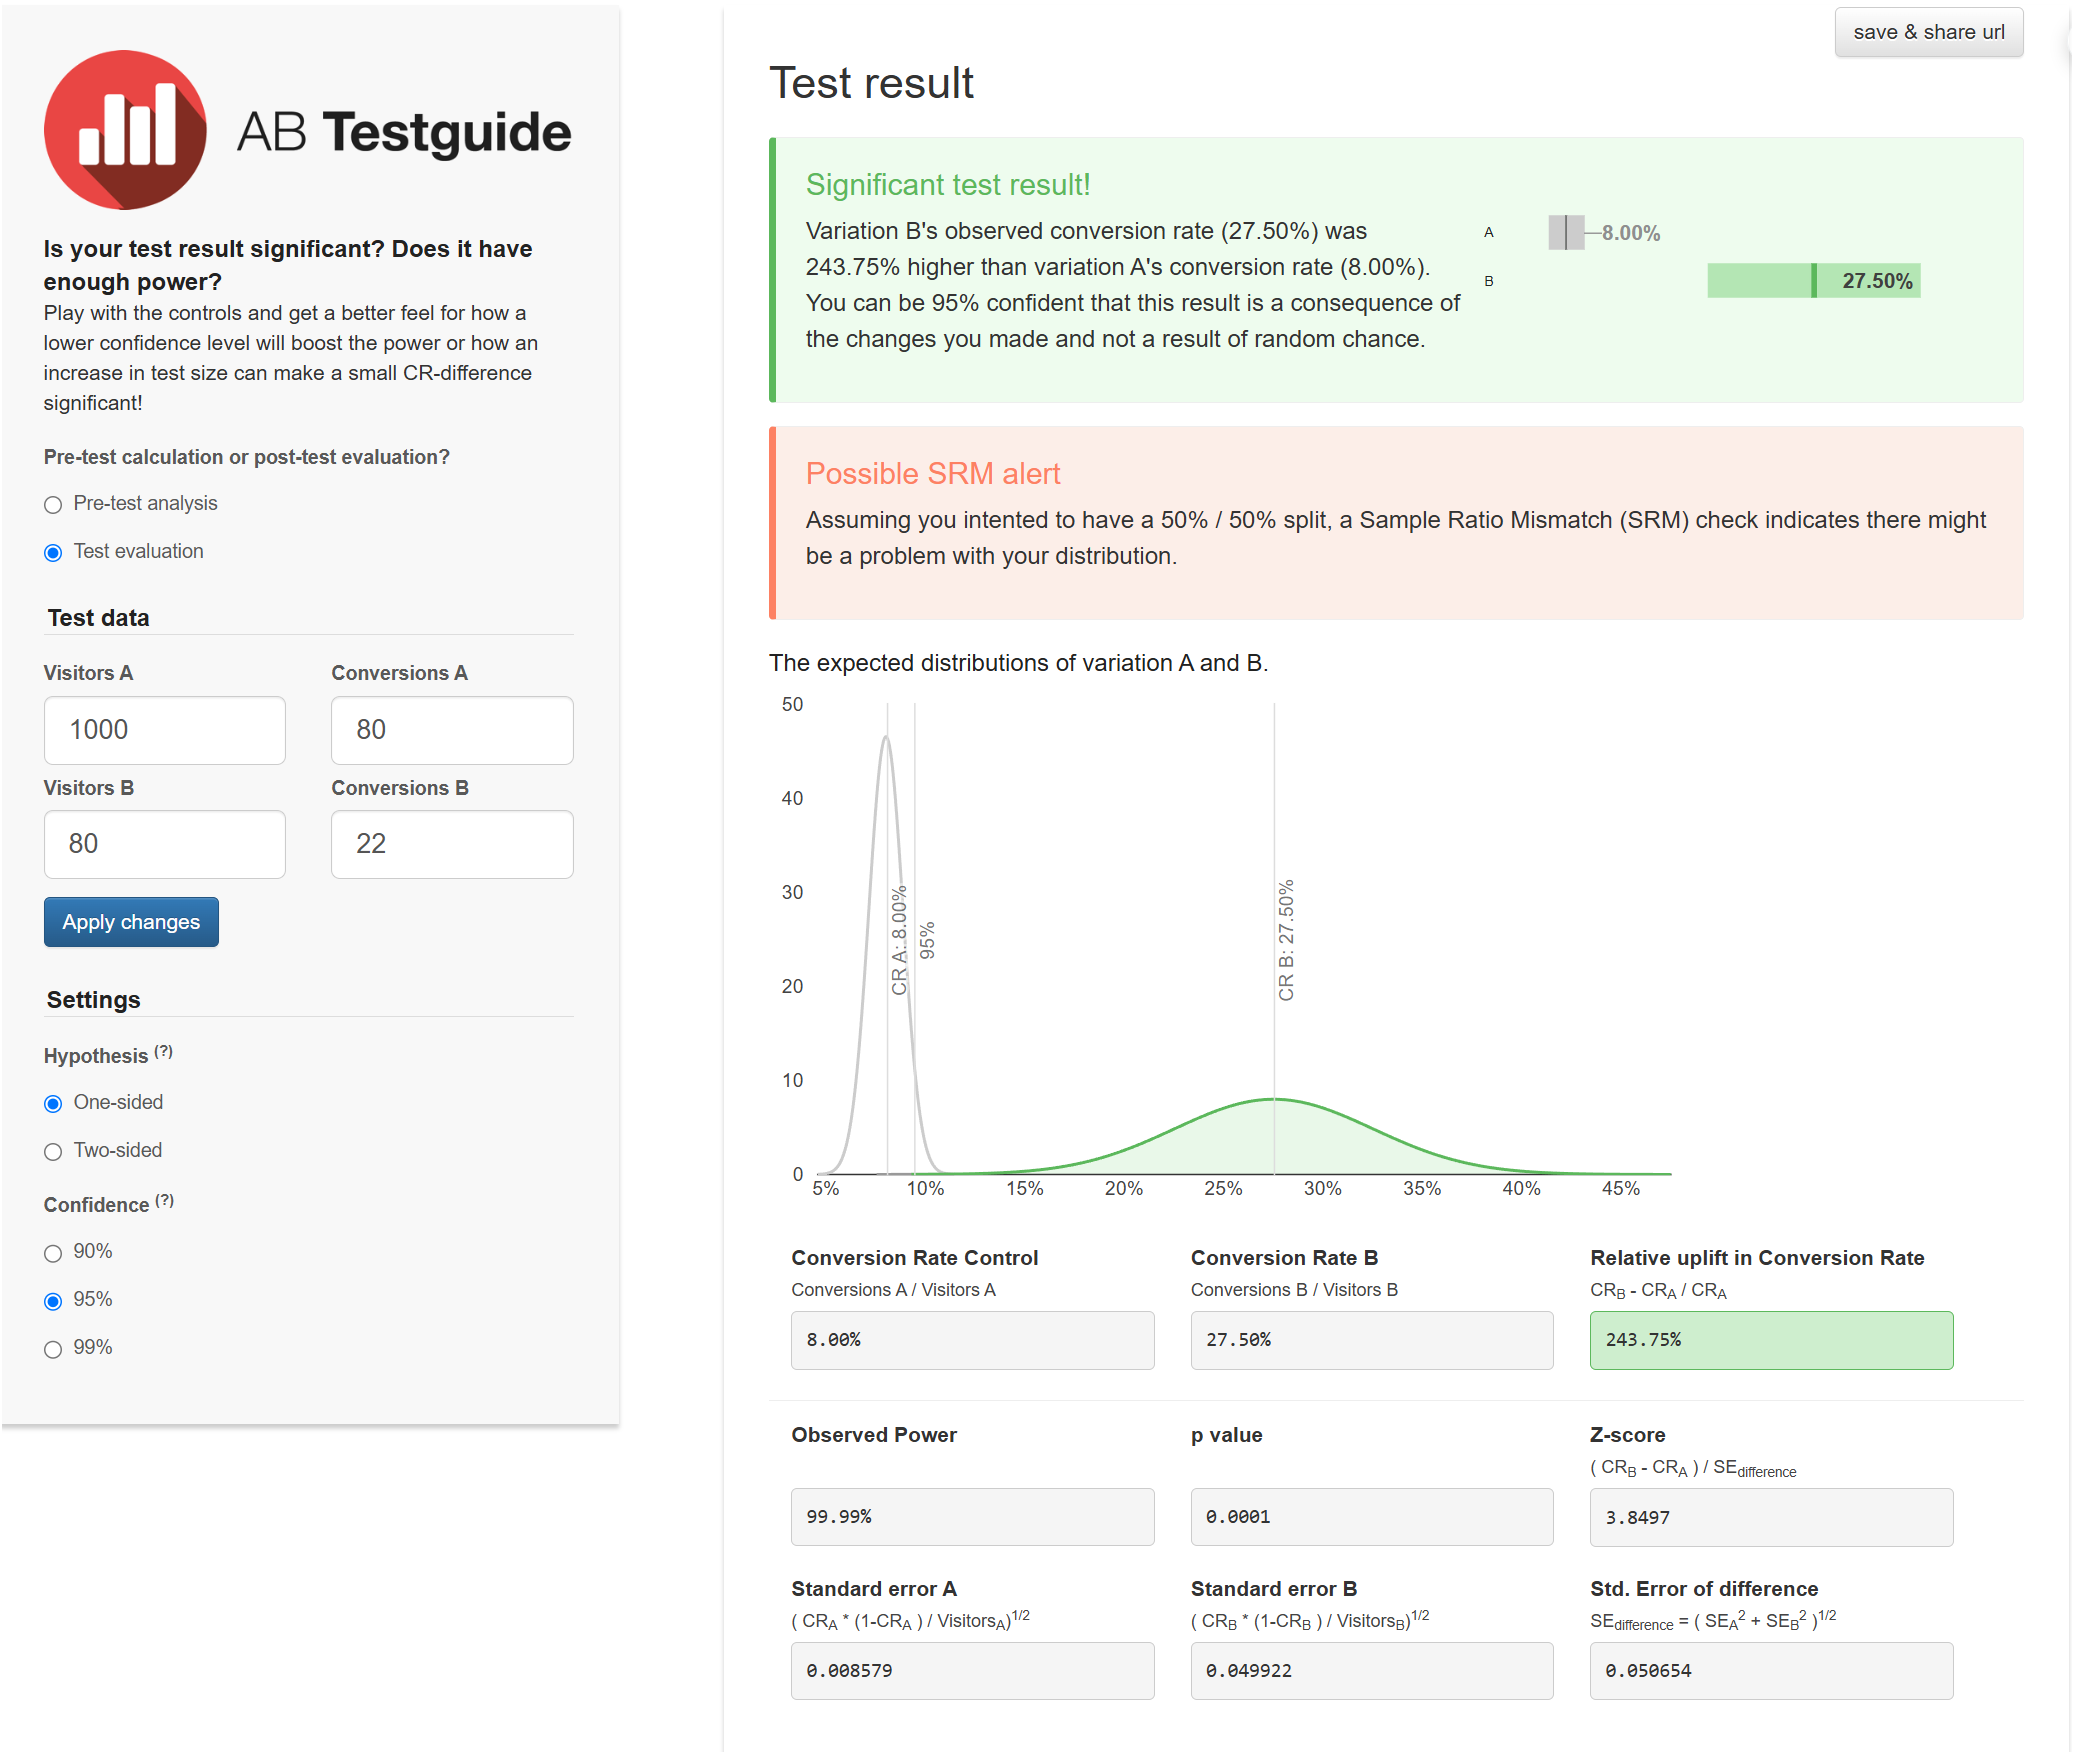

- p-value	0.0001	: 0.05보다 작음 → 귀무가설 기각 → 통계적으로 유의함
- Z-score	3.8497	: 정규분포 기준으로도 매우 큰 차이
- Conversin Rate전환율 차이	: 27.50% vs 8.00%	페이지 B가 A보다 243.75% 더 높은 전환율
-  결과 해석 : 신뢰수준 95%에서 페이지 B의 변화는 실질적 효과로 볼 수 있음

- A(1000)와 B(80)의 노출비율이 너무 다름 : 표본 할당 오류 가능성

======
### 문제 9번을 코딩해 보면 ~

In [ ]:
# 전환율 (Conversion Rate)
# 페이지 A : 80/1000 = 8.00%
# 페이지 B :  22/200 = 11.00%

# 페이지 B가 높아 보이나, 통계적으로 유의미 한 차이인지 확인 필요

- 귀무가설 H0 :	페이지 A와 B의 전환율은 같다
- 대립가설 H1 :	페이지 B의 전환율은 다르다 (양측검정 기준)

In [89]:
import numpy as np
from statsmodels.stats.proportion import proportions_ztest

# A/B 테스트 데이터
visitors_A = 1000
conversions_A = 80

visitors_B = 200
conversions_B = 22

In [91]:
# 성공 횟수 (구매 수), 총 시도 횟수 (노출 수)
successes = np.array([conversions_A, conversions_B])
successes


array([80, 22])

In [92]:
samples = np.array([visitors_A, visitors_B])
samples

array([1000,  200])

In [94]:
# z-test for proportions (양측 검정)
stat, p_value = proportions_ztest(count=successes, nobs=samples, alternative='two-sided')
p_value


#statsmodels.stats.proportion.proportions_ztest(
  # count, nobs, value=None, alternative='two-sided', prop_var=False)[source]
# 두 집단의 비율 차이를 비교하는 z-검정
# A/B테스트에서 두 그룹의 전환율(성공비율)을 비교할 때 사용

np.float64(0.16490727875464484)

In [95]:
# 결과 출력
print(f"z-통계량: {stat:.4f}")
print(f"p-value: {p_value:.4f}")

# 유의수준 0.05 기준 해석
alpha = 0.05
if p_value < alpha:
    print("페이지 B는 통계적으로 유의미하게 더 높은 전환율을 보입니다.")
else:
    print("페이지 B는 통계적으로 유의미하게 더 높은 전환율을 보인다고 할 수 없습니다.")


z-통계량: -1.3888
p-value: 0.1649
페이지 B는 통계적으로 유의미하게 더 높은 전환율을 보인다고 할 수 없습니다.


=================================================================
## **문제 10)**

- A/B 테스트의 결과가 통계적으로 유의하나 효과의 차이 자체는 매우 작은 경우,
- 어떤 의사결정을 할 수 있을지 사례를 통해 설명해 주세요.
- Hint) A/B 관련 자료를 찾아보세요. (추천 문헌 [요즘IT](https://yozm.wishket.com/))

In [ ]:
#

[링크](https://yozm.wishket.com/magazine/detail/1309/)

## 실패를 통해 배우는 AB테스트


### 1차 실험 -시행착오의 시작
- 문제사항 정의
- 마케팅을 통해 유저를 많이 모집했지만, 회원가입 창에서의 이탈이 많아 회가입으로 아루어지지 않았다.

###가설 설정
- 기존 회워가입/로그인 화면(Control)에서 정보 양이 너무 적어 유저가 다운로드 한 앱이무슨 앱인지 파악하기 어려워 전환이되지 않은 것이라고 가정

### 결론 도출
- 앱에 대한 정보를 제공해 전환율을 높이려 한다.


### 사례 요약:
- 이벤트 강조 vs. 콘텐츠 강조 실험
- 한 서비스에서 이벤트 강조형(A안)과 콘텐츠 강조형(B안) 두 가지 디자인을 비교하는 A/B 테스트를 진행

- A안: 이벤트 배너를 강조하여 사용자 참여를 유도
- B안: 콘텐츠를 중심으로 구성하여 정보 전달에 초점​

### 실험 결과 :
- 전환율 차이: A안이 B안보다 약간 높은 전환율을 보였으나, 그 차이는 매우 작음

- p-value: 0.04로 통계적으로 유의함

### 의사결정 고려사항
- 효과 크기: 실질적인 전환율 증가가 미미하다면, 변경의 필요성이 낮을 수 있습니다.

- 브랜드 일관성: 이벤트 강조형이 브랜드의 기존 커뮤니케이션 방식과 일치하는지 검토해야 합니다.

- 사용자 선호도: 일부 사용자들은 콘텐츠 중심의 구성을 더 선호할 수 있습니다.

- 장기적 영향: 작은 변화라도 장기적으로 누적되면 의미 있는 차이를 만들 수 있습니다.

========
### 소감
- 아직 해야할 것이 산처럼 크게 보이고, 모른 것은 더 크게 보이고 있습니다만, 이제 통계를 하는 것 같습니다.
- 데이터분석의 짭짭한 맛도 보고, 앞으로 더 짭쪼름 할 것 같습니다.^^
- 넘 짭쪼름 하여,  완주를 잘 할 수 있을지 염려가 되긴 하지만, 그래도 모두연을 만나 넘 감사할 뿐입니다.
- 임정강사님의 명강의를 듣게 되어 더 감사합니다.